In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

def fit(t, x, y):
    """The fitted values along the regression line."""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

def plot_residuals(t, x, y):
    """Plot a scatter diagram and residuals."""
    t.scatter(x, y, fit_line=True)
    actual = t.column(y)
    fitted = fit(t, x, y)
    residuals = actual - fitted
    print('r:', correlation(t, x, y))
    print('RMSE:', np.mean(residuals**2)**0.5)
    t.select(x).with_column('Residual', residuals).scatter(0, 1)

## Regression Model

#### Let's assume that the actual dataset we were given came from a linear model with a given slope and intercept. However, since the data never really lies on a straight line, let's also assume that each actual point in the dataset ultimately came from a straight line + some random noise.


#### Using regression techniques, is it possible for us to find out the original data generation process? If not, how close to the original line can we get? And lastly, why can we not find the EXACT original data generation process (hint: random noise is RANDOM!!!)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

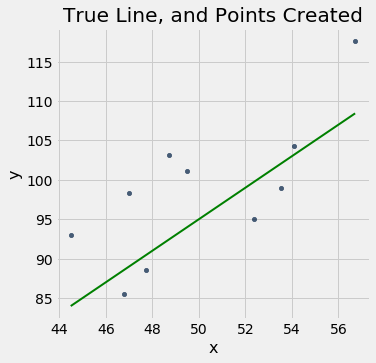

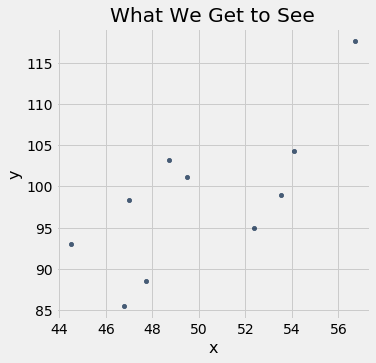

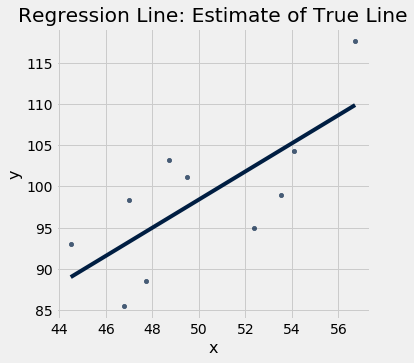

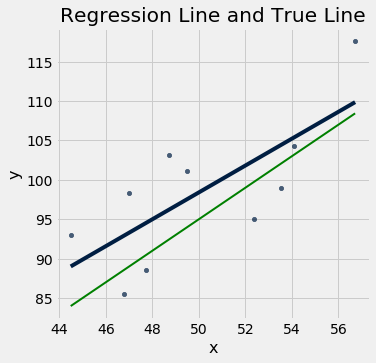

In [3]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)
    
    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')
    
    sample.scatter('x', 'y')
    plots.title('What We Get to See')
    
    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')
    
    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('Regression Line and True Line')
    
draw_and_compare(2, -5, 10)

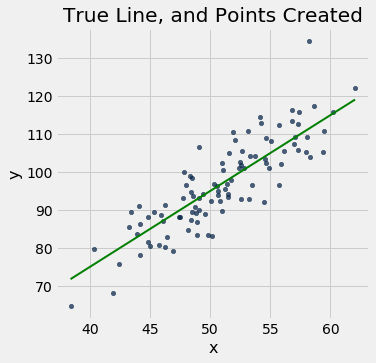

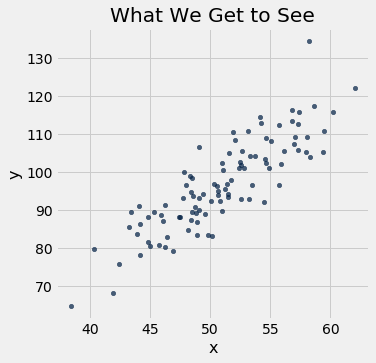

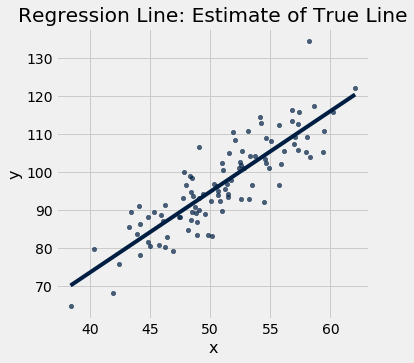

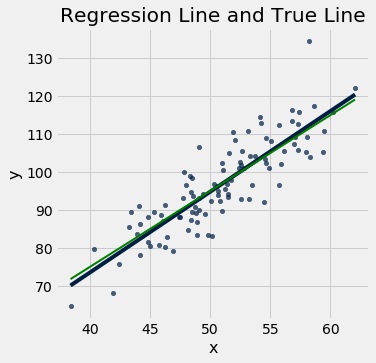

In [4]:
draw_and_compare(2, -5, 100)

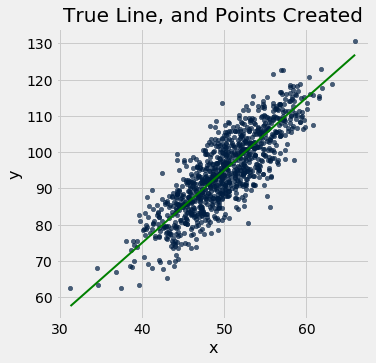

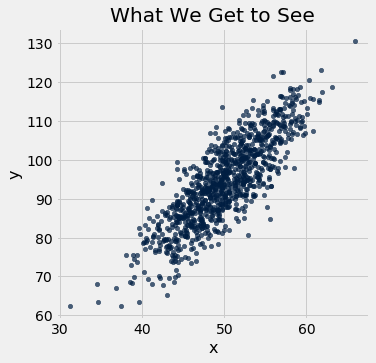

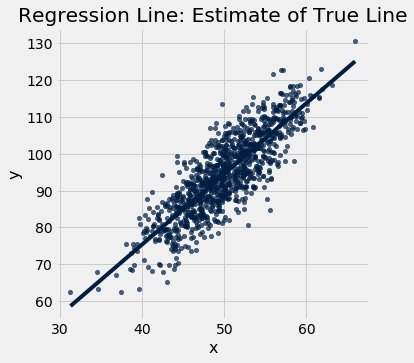

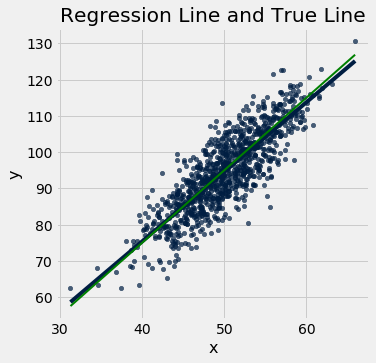

In [5]:
draw_and_compare(2, -5, 1000)

#### Conclusion: IF we assume that the dataset came from a LINEAR data generation process (a linear model), we CAN get VERY CLOSE to estimating the original straight line. However, there are two factors that prevent us from EXACTLY finding the original line:-

#### 1. the original process also introduced some RANDOM noise and we cannot reproduce that exactly. Viola RANDOMNESS!!
#### 2. if we have very less data points for a given value of x (e.g small sample size), our predicitions will vary wildy. However, if we had enough data points for a given value of x (e.g large sample size), we can get VERY close to the original line!!

## Prediction Variability

#### We are able to find out the regression line for the SAMPLE we were given using these techniques. But how about the population? Can we use the outcome of predictions based on a sample to derive predictions about the population itself (Yes, remember bootstrapping!!)? Because the sample was chosed at random from the population to begin with, we must factor for the variability in the inferences based on the sample. We do that by finding confidence interval about our sample-based prediction when applied to the population i.e how confident are we about the predicted value? For the below example, let's say we want our confidence to be the MIDDLE 95%, so we choose to calculate a 2.5 percentile and 97.5 percentile. The range between the two will be our prediction. 

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [6]:
baby = Table.read_table('baby.csv')
baby.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


r: 0.4075427933888511
RMSE: 16.730358256655432


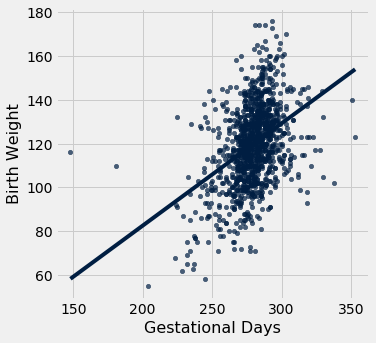

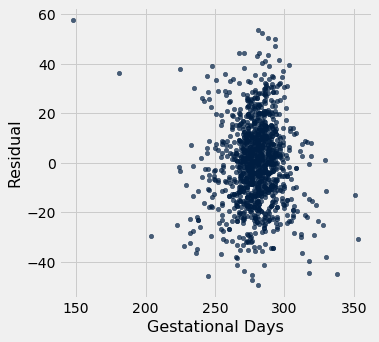

In [7]:
plot_residuals(baby, 'Gestational Days', 'Birth Weight')

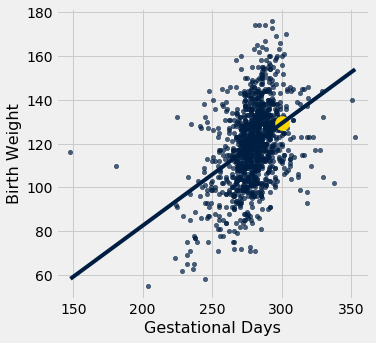

In [8]:
x = 300
a = slope(baby, 'Gestational Days', 'Birth Weight')
b = intercept(baby, 'Gestational Days', 'Birth Weight')
predicted_y = a * x + b
baby.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.scatter(300, predicted_y, color='gold', s=200);

In [9]:
predicted_y

129.2129241703143

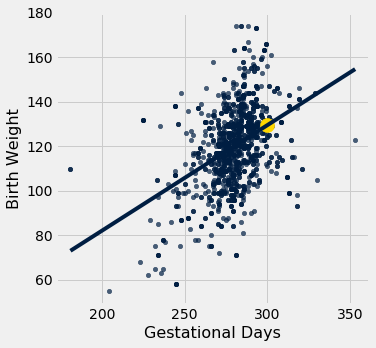

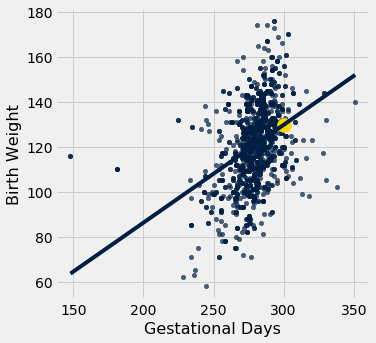

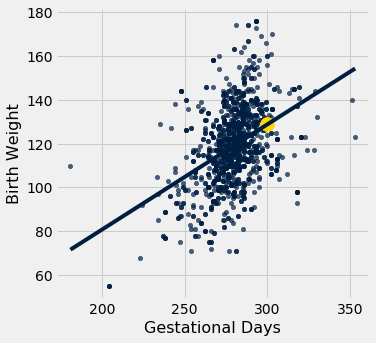

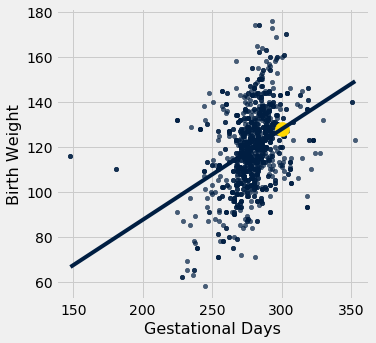

In [10]:
def prediction_at(t, x):
    a = slope(t, 'Gestational Days', 'Birth Weight')
    b = intercept(t, 'Gestational Days', 'Birth Weight')
    return a * x + b

for i in np.arange(4):
    resample = baby.sample()
    predicted_y = prediction_at(resample, 300)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=200)

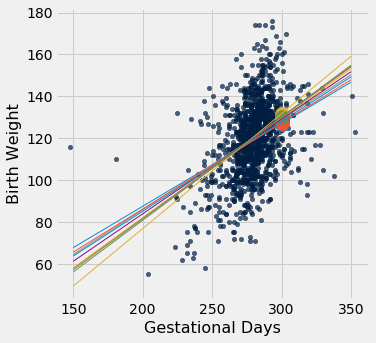

In [11]:
lines = Table(['slope', 'intercept', 'at 150', 'at 300', 'at 350'])

for i in range(10):
    resample = baby.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 150 + b, a * 300 + b, a * 350 + b])
    
baby.scatter('Gestational Days', 'Birth Weight')
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([150, 350], [line.item('at 150'), line.item('at 350')], lw=1)
    plots.scatter(300, line.item('at 300'), s=200)

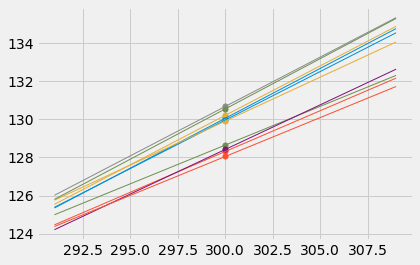

In [12]:
# Let's zoom in to those lines and see what's going on at more detail
lines = Table(['slope', 'intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = baby.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])
    
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Approximate 95%-confidence interval for height of true line:
127.26572857082724 131.28170822620484 (width = 4.015979655377606 )


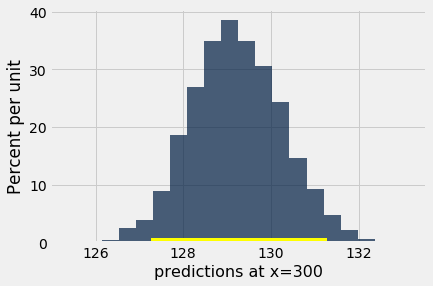

In [13]:
def bootstrap_prediction(table, x, y, new_x, repetitions=5000):

    # Bootstrap resampling
    predictions = []
    for i in np.arange(repetitions):
        resample = table.sample()
        a = slope(resample, x, y)
        b = intercept(resample, x, y)
        predicted_y = a * new_x + b
        predictions.append(predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')')
    
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 300)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Approximate 95%-confidence interval for height of true line:
138.83802643484597 147.92666498585146 (width = 9.088638551005488 )


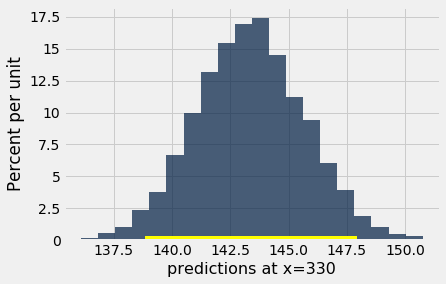

In [14]:
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 330)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Approximate 95%-confidence interval for height of true line:
118.90513113144765 120.86823939908149 (width = 1.9631082676338423 )


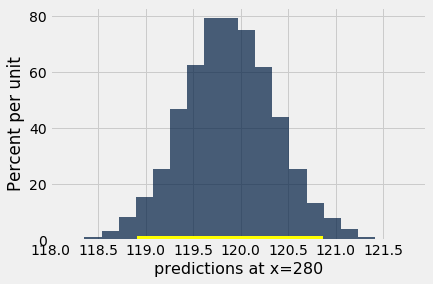

In [15]:
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 280)

#### Conclusion: Since we have many more data points at x=300 or x = 280, the spread in our predcition was very narrow. At 330, we has lesser data points to work with and hence our prediction has more spread. So to be more accurate with prediction at any point x, we need to have large number of available data points in the data at that x for our prediction!

## Slope Inference

#### Note: This snippet from the course textbook explains an important aspect to remember: "In reality, of course, we will never see the true line. What the simulation shows that if the regression model looks plausible, and if we have a large sample, then the regression line is a good approximation to the true line."

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

#### Given just a random sample from a population, can we infer anything about the population's regression model using the sample's regression model outcomes? Yes, by bootstrapping!!

In [27]:
# First, let's find the regression model for the population before comparing with sample regression model
slope(baby, 'Gestational Days', 'Birth Weight')

0.4665568769492152

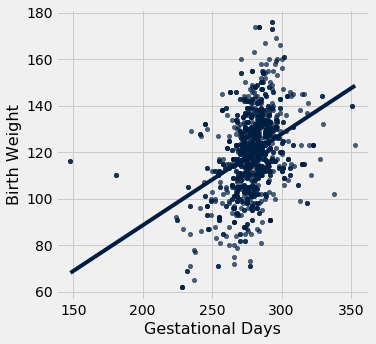

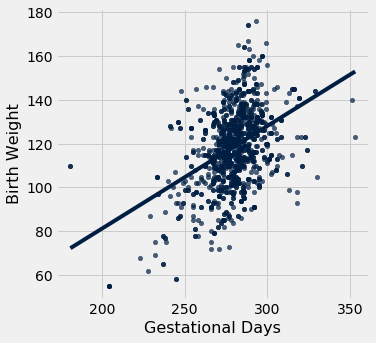

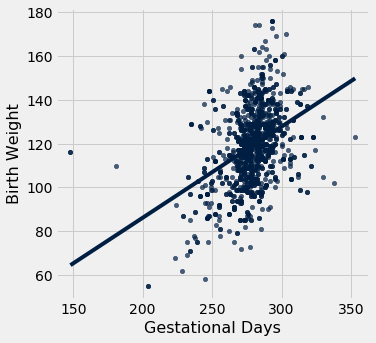

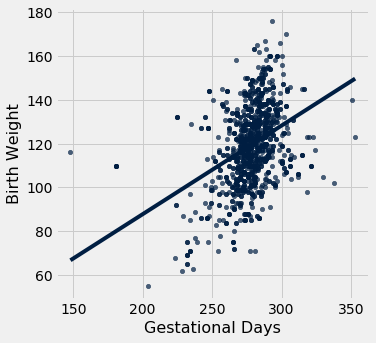

In [28]:
for i in np.arange(4):
    baby.sample().scatter('Gestational Days', 'Birth Weight', fit_line=True)

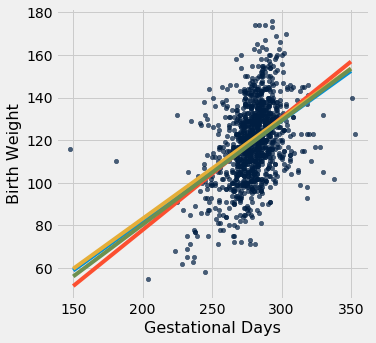

In [29]:
baby.scatter('Gestational Days', 'Birth Weight')
for i in np.arange(4):
    resample = baby.sample()
    s = slope(resample, 'Gestational Days', 'Birth Weight')
    c = intercept(resample, 'Gestational Days', 'Birth Weight')
    xlims = make_array(150, 350)
    plots.plot(xlims, s*xlims + c, lw=4)

In [30]:
baby.num_rows

1174

In [31]:
baby.sample().num_rows

1174

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


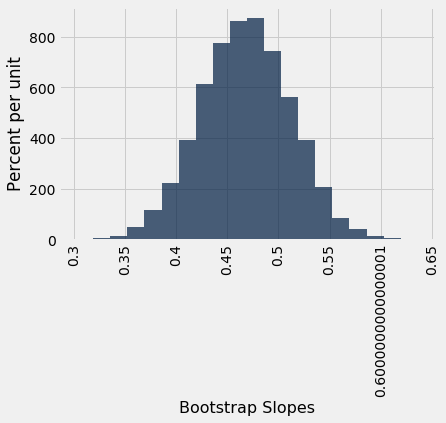

In [32]:
slopes = []
for i in np.arange(5000):
    resample = baby.sample()
    resample_slope = slope(resample, 'Gestational Days', 'Birth Weight')
    slopes.append(resample_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

In [34]:
# Now we find the confidence interval for middle 95%
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
[left, right]

[0.3813053678866069, 0.5532417286294419]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Slope of regression line: 0.4665568769492152
Approximate 95%-confidence interval for the true slope:
0.38074886193898416 0.557019200896398


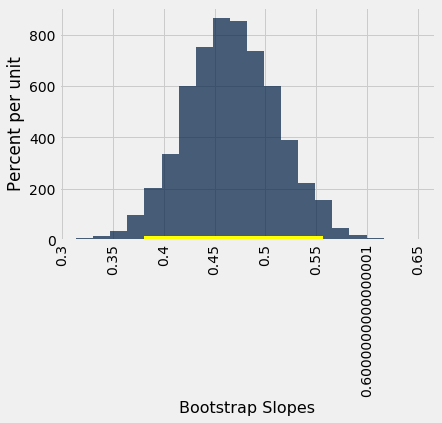

In [35]:
def bootstrap_slope(table, x, y, repetitions=5000):
    
    # Bootstrap resampling
    slopes = []
    for i in np.arange(repetitions):
        resample = table.sample()
        resample_slope = slope(resample, x, y)
        slopes.append(resample_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)
    
bootstrap_slope(baby, 1, 0)

#### What if the two variables being compared (x and y) are not linearly related at all? In that case, we can predict the same value of Y (usually the average) for EVERY value of x!

r: -0.053424773507798104
RMSE: 15.980630030890573


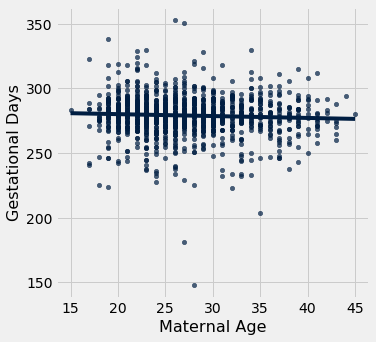

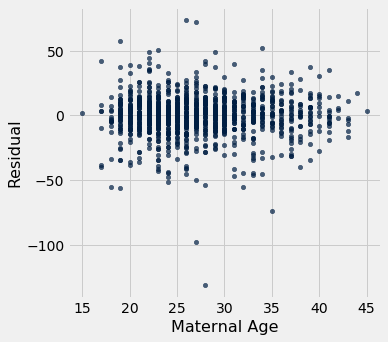

In [40]:
# In this below case, two variables are not linearly related but the residual plot also doesn't have any trend (meaning linear relationship!).
# This is because zero is also a plausible value in the 95% confidence interval. In such a case, we assume no linear relationship.
plot_residuals(baby, 2, 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Slope of regression line: -0.14702142270280957
Approximate 95%-confidence interval for the true slope:
-0.3067863718478692 0.0014946151622627511


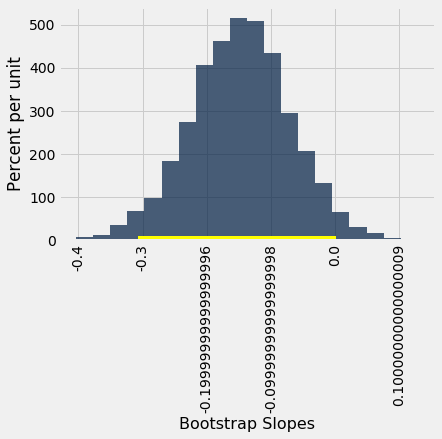

In [41]:
bootstrap_slope(baby, 2, 1)

### In conclusion, Since we can construct a 95% confidence interval for the true slope, all we have to do is see whether the interval contains 0.

### Null Hypothesis. The slope of the true line is 0.

### Alternative Hypothesis. The slope of the true line is not 0.

### If it doesn’t, then we can reject the null hypothesis (with the 5% cutoff for the P-value).

### If the confidence interval for the true slope does contain 0, then we don’t have enough evidence to reject the null hypothesis. Perhaps the slope that we are seeing is spurious.